In [2]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t_dist
from scipy.stats import norm

import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

In [3]:
X = np.array([130, 150, 133, 170, 170, 210, 230])
Y = np.array([84, 120, 108, 130, 130, 150, 160])

np.corrcoef(X, Y)

array([[1.        , 0.94705241],
       [0.94705241, 1.        ]])

Ta thấy hệ số tương quan là: __0.9470__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [4]:
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = 17.2706 + 0.6380 * X


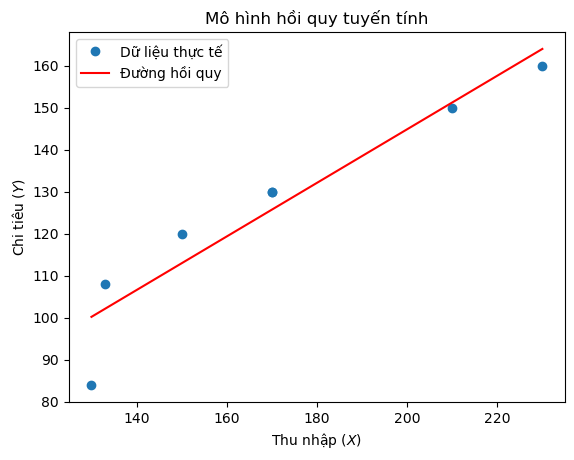

In [5]:
plt.plot(X, Y, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Thu nhập ($X$)')
plt.ylabel('Chi tiêu ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [6]:
value = 200
y = b0 + b1 * value

print(f"Dự đoán chi tiêu khi thu nhập là {value}$: {y:.4f}")

Dự đoán chi tiêu khi thu nhập là 200$: 144.8659


### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

In [ ]:
X = np.array([35, 40, 45, 40, 38, 40, 45, 30, 42, 38])
Y = np.array([2.29, 2.04, 0.59, 2.06, 2.5, 2.32, 1.57, 3.96, 1.43, 2.34])

np.corrcoef(X, Y)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

Ta thấy hệ số tương quan là: __-0.91953287__ cho thấy 2 biến x, y có tương quan tuyến tính ngược mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [ ]:
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = 9.0808 + -0.1774 * X


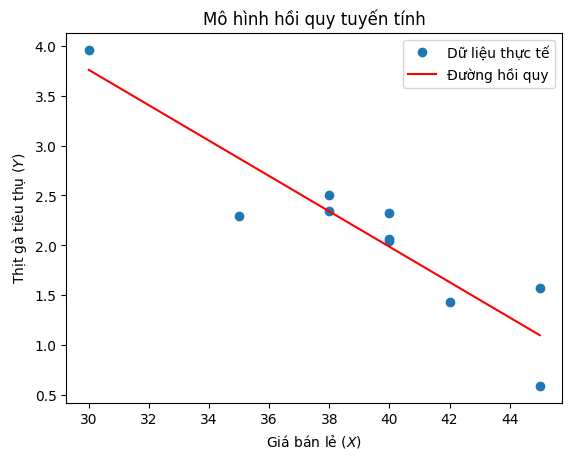

In [ ]:
plt.plot(X, Y, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Giá bán lẻ ($X$)')
plt.ylabel('Thịt gà tiêu thụ ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(nghìn/tháng)

In [ ]:
value = 41
y = b0 + b1 * value

print(f"Dự đoán chi tiêu khi thu nhập là {value}$: {y:.4f}")

Dự đoán chi tiêu khi thu nhập là 41$: 1.8085


### Bài 3

Khảo sát điểm trung bình các bài lab của một môn học X(\$) và điểm thi cuối kỳ Y(\$) trong một môn học. Khảo sát ngẫu nhiên 8 sinh viên, ta thu được bảng số liệu sau:

| Điểm trung bình các lab          | 7.5     | 5.5      | 3.0      | 8      | 9      | 1      | 6      |  6      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |:------: |
| Điểm thi cuối kỳ       | **8**  | **6.5**  | **4**  | **7.5**  | **9.5**  | **3**  | **5**  | **6**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước điểm trung bình các bài lab dựa theo điểm thi cuối kỳ. (1đ)

b. Dự đoán điểm trung bình các bài lab của một sinh viên có điểm thi cuối kỳ là 6.5. (1đ)

In [ ]:
X = np.array([8, 6.5, 4, 7.5, 9.5, 3, 5, 6])
Y = np.array([7.5, 5.5, 3.0, 8, 9, 1, 6, 6])


np.corrcoef(X, Y)

array([[1.        , 0.94329099],
       [0.94329099, 1.        ]])

Ta thấy hệ số tương quan là: __0.94329099__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [ ]:
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = -1.4201 + 1.1588 * X


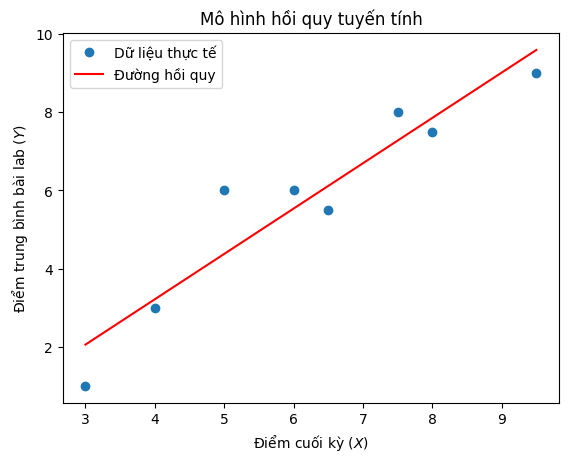

In [ ]:
plt.plot(X, Y, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Điểm cuối kỳ ($X$)')
plt.ylabel('Điểm trung bình bài lab ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

**(0.5đ)** Vậy mô hình hồi quy giữ điểm trung bình các bài lab $Y$ và điểm thi cuối kỳ $X$ là: $$Y\approx-1,42+1,15X$$

b. Dự đoán điểm trung bình các bài lab của một sinh viên có điểm thi cuối kỳ là 6.5. (1đ)


In [ ]:
value = 6.5
y = b0 + b1 * value


print(f"Dự đoán điểm trung bình bài lab với điểm thi cuối kỳ là {value}: {y}")

Dự đoán điểm trung bình bài lab với điểm thi cuối kỳ là 6.5: 6.112127045235804
